<a href="https://colab.research.google.com/github/gracejeffery/my-code/blob/main/GraceJeffery_Project2_MIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project by Grace Jeffery

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
# libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for data processing
import numpy as np
import pandas as pd

# To build model for prediction
import statsmodels.stats.api as sms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV


In [ ]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the dataset into python
data = pd.read_csv('/content/drive/MyDrive/data science MIT <3/ExtraaLearn.csv')

## Data Overview

- Observations
- Sanity checks

In [ ]:
# look at the first 5 rows of the dataset
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# look at the last 5 rows of the dataset

data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [ ]:
# dimensions of data
data.shape

(4612, 15)

The data frame has 4612 rows and 15 columns

In [ ]:
# exploring data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

* 15 columns, 4612 data points in each, no missing values
* 10 categorical features
* 4 integers and 1 float for 5 numerical features

In [ ]:
# 5 point summary for numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


* Leads have a wide range of ages (18-63)
* The max amount of website visits is 30. The median is only 3.
* The mean time spent on the website is 743. I think the unit is seconds.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

In [ ]:
# determining the number of leads who become customers and the number who don't

print(data['status'].value_counts(normalize=True))

0    0.701431
1    0.298569
Name: status, dtype: float64


30% of leads become paying customers.

In [ ]:
# comparing referrals and customer status

pd.crosstab(data['referral'],data['status'])

status,0,1
referral,,
No,3205,1314
Yes,30,63


Although referrals are uncommon, they result in a lead becoming a customer 2/3rds of the time.

In [ ]:
# comparing digital media ad viewing and customer status

pd.crosstab(data['digital_media'],data['status'])

status,0,1
digital_media,,
No,2876,1209
Yes,359,168


* 42% of people who did not see an ad online became a customer
* 47% of people who did see an ad online became a customer
* Online ads seem to draw many people to become customers

In [ ]:
# comparing educational channel ad views and customer status

pd.crosstab(data['educational_channels'],data['status'])

status,0,1
educational_channels,,
No,2727,1180
Yes,508,197


* 43% of people who didn't see an ad on an educational channel became a customer
* 38% of people who did see an ad on an educational channel became a customer

In [ ]:
# comparing newspaper ad views and customer status

pd.crosstab(data['print_media_type1'],data['status'])

status,0,1
print_media_type1,,
No,2897,1218
Yes,338,159


Nearly 50% of people who saw an ad in a newspaper became a customer.

In [ ]:
# comparing magazine ad views and customer status

pd.crosstab(data['print_media_type2'],data['status'])

status,0,1
print_media_type2,,
No,3077,1302
Yes,158,75


Nearly 50% of the people who saw the ad in a magazine became a customer

[Text(0.5, 1.0, 'Occupation Conversion Rate')]

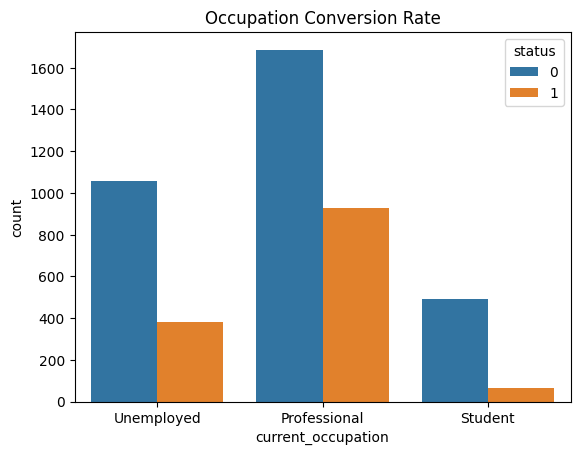

In [ ]:
# bar graph comparing the number of leads in different occupations for both those who became customers and those who did not

sns.countplot(data = data, x = 'current_occupation', hue = 'status').set(title="Occupation Conversion Rate")

Professionals are by far the most interested in the online learning platform. The majority of the customers are professionals, followed by unemployed, and then students. Very few students become customers, probably because they are already in school and would not have time for more classes.

[Text(0.5, 1.0, 'First Interaction Conversion Rate')]

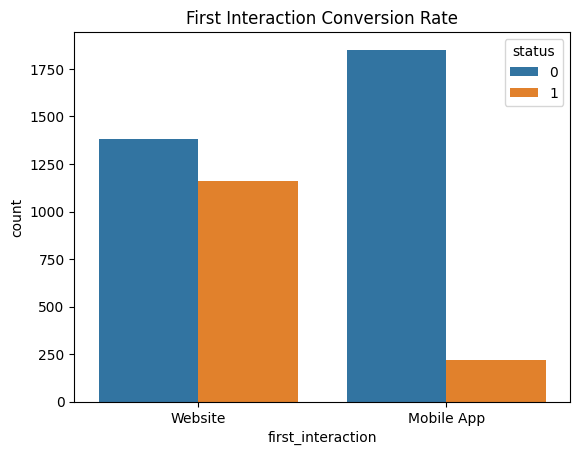

In [ ]:
# bar graph comparing customer status based on first interaction platform

sns.countplot(data = data, x = 'first_interaction', hue = 'status').set(title="First Interaction Conversion Rate")

The mobile app seems to need improvement - it pushes away many potential customers.
Nearly 50% of people whose first interaction was on the website became customers.

[Text(0.5, 1.0, 'Profile Completion Conversion Rate')]

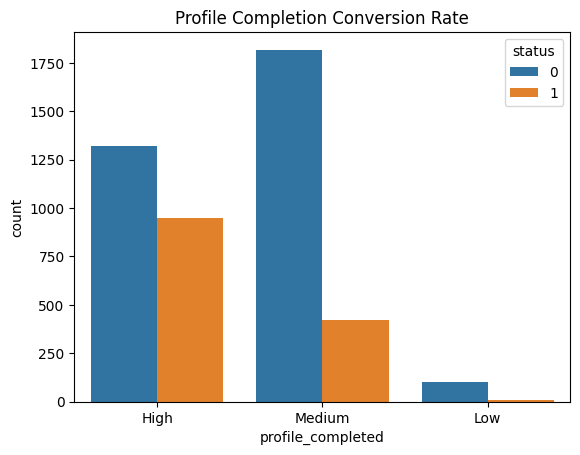

In [ ]:
# bar graph comparing customer status based on completion level of a profile

sns.countplot(data = data, x = 'profile_completed', hue = 'status').set(title="Profile Completion Conversion Rate")

People who fill out a large amount of their profile tend to become customers more often than someone who has filled out a medium amount or very little.

[Text(0.5, 1.0, 'Last Activity Conversion Rate')]

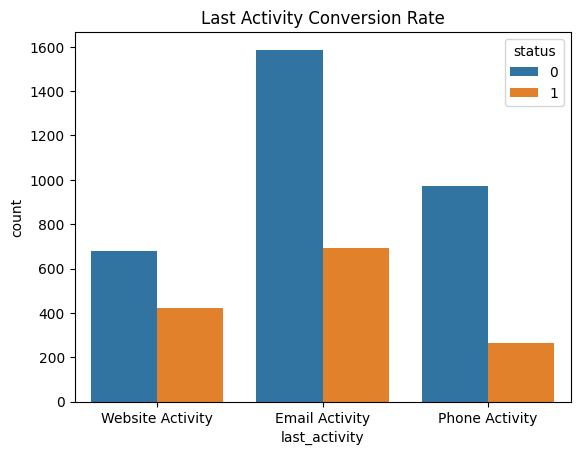

In [ ]:
# bar graph comparing customer status based on their last activity

sns.countplot(data = data, x = 'last_activity', hue = 'status').set(title="Last Activity Conversion Rate")

* Emailing is the most popular activity; however, only about 1/3 of emailers become customers.
* People who call on the phone do not become customers most of the time.
* People who spend time on the website as their last activity have the highest chance of becoming a customer compared to the other activites. That chance is still only about 36%.

[Text(0.5, 1.0, 'Age of Leads Based on Status')]

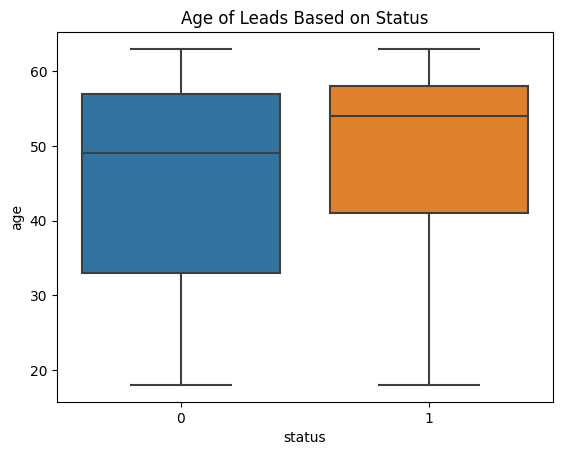

In [ ]:
# boxplot comparing age of leads who became customers and those who did not

sns.boxplot(x = "status", y = "age", data=data).set(title="Age of Leads Based on Status")


The median age of customers is higher than the median age of leads who do not become customers.

[Text(0.5, 1.0, 'Number of Website Visits Based on Status')]

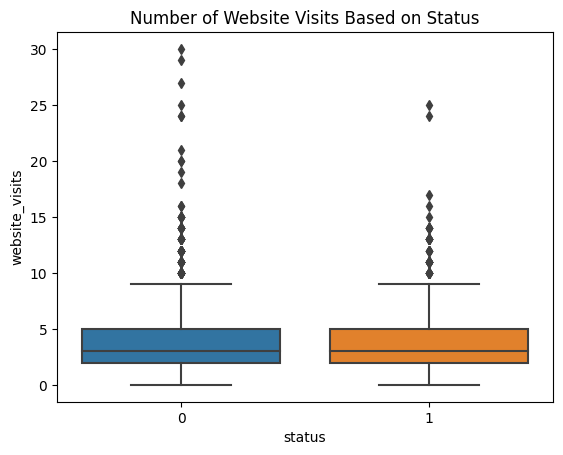

In [ ]:
# boxplot comparing the number of website visits between leads who became customers and leads who did not

sns.boxplot(x = "status", y = "website_visits", data=data).set(title="Number of Website Visits Based on Status")


Number of website visits does not seem to effect whether or not the lead becomes a customer or not.

[Text(0.5, 1.0, 'Time Spent on Website Based on Status')]

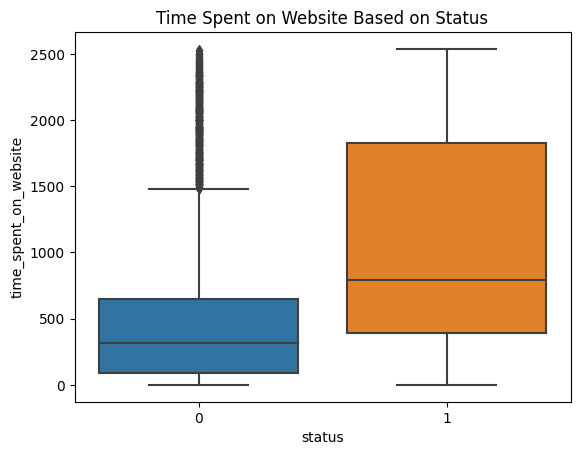

In [ ]:
# boxplot comparing the time spent on the website based on customer status

sns.boxplot(x = "status", y = "time_spent_on_website", data=data).set(title="Time Spent on Website Based on Status")


Leads who spend more time on the website become customers.

[Text(0.5, 1.0, 'Website Page Views Per Visit Based on Status')]

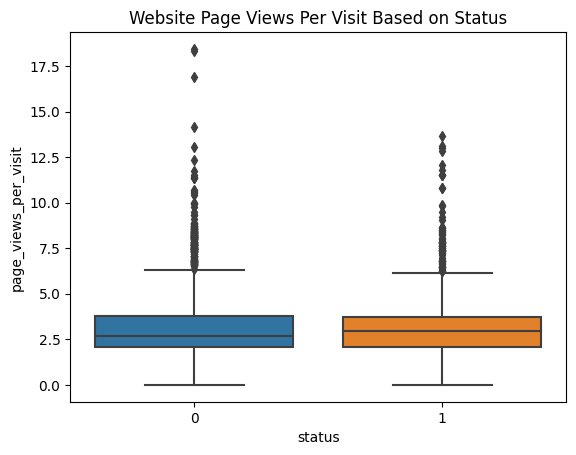

In [ ]:
# boxplot comparing page views per visit of the website based on customer status

sns.boxplot(x = "status", y = "page_views_per_visit", data=data).set(title="Website Page Views Per Visit Based on Status")


Page views per website visit does not seem to effect whether or not a lead becomes a paying customer.

<Axes: >

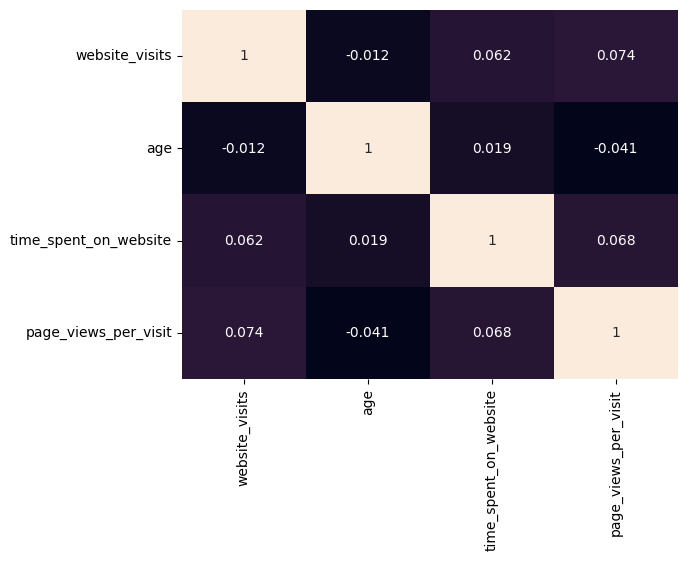

In [ ]:
# heatmap to explore correlation between numerical data

sns.heatmap(
    data=data[["website_visits", "age", "time_spent_on_website", "page_views_per_visit"]].corr(),
    annot=True,
    cbar=False
)

No correlation between numerical features.

EDA Conclusions:
* professionals more often turn into customers than the unemployed or students.
* most leads who become customers are older in age than leads who do not
* the number of website visits is unimportant; rather the people who spend much more time on the website more often become customers
* referrals produce customers 2/3rds of the time
* Most leads who have their first interaction on the website become customers far more often than those who have their first interaction on the mobile app. Perhaps the app needs improvement so it doesn't drive away so many customers as it still gets lots of traffic.
* Leads who completed a lot of their profile become paying customers more often than those who only complete a medium or small amount.
* People who see an ad online, in a newspaper, or in a magazine become customers about 50% of the time, which is an excellent converstion rate.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# check for missing values
data.isnull().values.any()

False

There are no missing values in the dataset.

In [ ]:
# remove ID as it is not needed for building the model
data=data.drop(columns=["ID"])

In [ ]:
# checking that the ID column is dropped
data

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [ ]:
# checking for duplicate rows in the data set
data.duplicated().sum()

14

In [ ]:
# dropping the duplicate rows
data = data.drop_duplicates()

In [ ]:
# checking again to ensure there are now no duplicates
data.duplicated().sum()

0

In [ ]:
# creating dummy variables for categorical variables
get_dummies_for = ['current_occupation','first_interaction','profile_completed','last_activity']

# adding the dummy variables to the data set
data = pd.get_dummies(data = data, columns = get_dummies_for, drop_first = False)

# changing the columns with Yes/No data into 0 and 1 by creating dictionaries and then mapping it into the data set
dict_print_media_type1 = {'Yes': 1, 'No':0}
dict_print_media_type2 = {'Yes': 1, 'No': 0}
dict_digital_media = {'Yes': 1, 'No': 0}
dict_educational_channels = {'Yes': 1, 'No': 0}
dict_referral = {'Yes': 1, 'No': 0}

data['print_media_type1'] = data.print_media_type1.map(dict_print_media_type1)
data['print_media_type2'] = data.print_media_type2.map(dict_print_media_type2)
data['digital_media'] = data.digital_media.map(dict_digital_media)
data['educational_channels'] = data.educational_channels.map(dict_educational_channels)
data['referral'] = data.referral.map(dict_referral)

In [ ]:
# separating our target variable (status) and independent variables (all other columns)
Y = data.status
X = data.drop(columns = ['status'])

In [ ]:
# splitting the data into training data (70%) and testing data (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# looking at the data types for the manipulated data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4598 entries, 0 to 4611
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              4598 non-null   int64  
 1   website_visits                   4598 non-null   int64  
 2   time_spent_on_website            4598 non-null   int64  
 3   page_views_per_visit             4598 non-null   float64
 4   print_media_type1                4598 non-null   int64  
 5   print_media_type2                4598 non-null   int64  
 6   digital_media                    4598 non-null   int64  
 7   educational_channels             4598 non-null   int64  
 8   referral                         4598 non-null   int64  
 9   status                           4598 non-null   int64  
 10  current_occupation_Professional  4598 non-null   uint8  
 11  current_occupation_Student       4598 non-null   uint8  
 12  current_occupation_U

* All the columns are now numerical consisting of int64, float64, and uint8.
* There are now 4598 rows (because we removed duplicates) and 21 columns
* There are no missing values

In [ ]:
# table to compare the Professional occupation with customer status

pd.crosstab(data['current_occupation_Professional'],data['status'])

status,0,1
current_occupation_Professional,,
0,1542,448
1,1681,927


Out of the 4598 leads, 927 are Professional customers and 448 are unemployed or student customers.

In [ ]:
# table to compare mobile app usage and customer status

pd.crosstab(data['first_interaction_Mobile App'],data['status'])

status,0,1
first_interaction_Mobile App,,
0,1379,1157
1,1844,218


1844 leads who used the mobile app did not become customers and only 218 leads who used the mobile app became paying customers.

In [ ]:
# table to compare mobile app usage and customer status

pd.crosstab(data['profile_completed_High'],data['status'])

status,0,1
profile_completed_High,,
0,1912,431
1,1311,944


Once again shows that people who have filled out most of the profile became paying customers.

## Building a Decision Tree model

In [ ]:
# building decision tree model
dtree = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

In [ ]:
# fitting the data to the model
dtree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

In [ ]:
# checking the model performance on the training dataset
y_train_pred_dt = dtree.predict(X_train)

In [ ]:
# importing more libraries for the decision tree analysis
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

# function to calculate the accuracy and recall of the model
# also creates a heatmap to visualize true negatives, true positives, false negatives, and false positives
def score(actual, predicted):
    print(classification_report(actual, predicted))

    cmatrix = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cmatrix, annot=True,  fmt='.2f', xticklabels=['Not Customer', 'Customer'], yticklabels=['Not Customer', 'Customer'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2256
           1       1.00      1.00      1.00       962

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



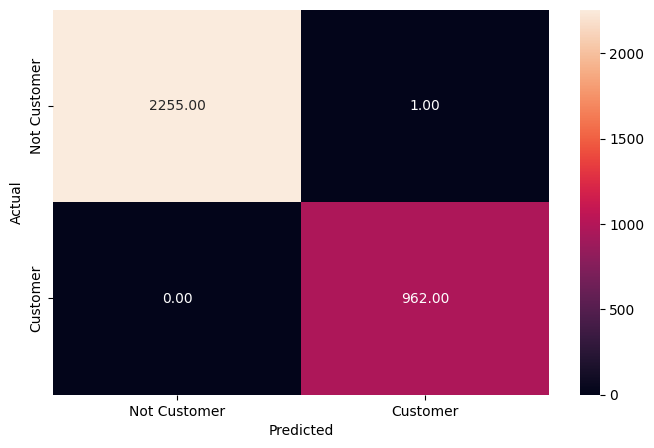

In [ ]:
# using the previously defined function to analyze the tree on training data
score(Y_train, y_train_pred_dt)

The model corrected identified all the training data (accuracy = 1). The model is overfitting the data, but lets see how the test data does.

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       967
           1       0.64      0.68      0.66       413

    accuracy                           0.79      1380
   macro avg       0.75      0.76      0.75      1380
weighted avg       0.79      0.79      0.79      1380



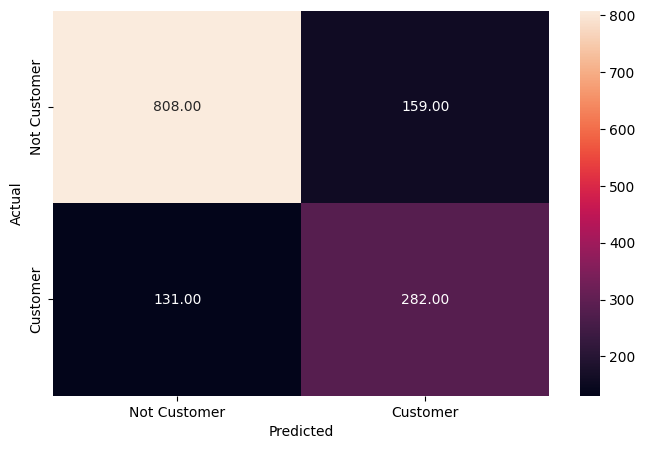

In [ ]:
# checking performance on the test data
y_test_pred_dt = dtree.predict(X_test)

score(Y_test, y_test_pred_dt)

The accuracy is far lower for the test data at 79%. The recall is also very low at 68%. Perhaps pruning the tree will help.

[Text(0.5, 1.0, 'Importance of the Features for the Decision Tree')]

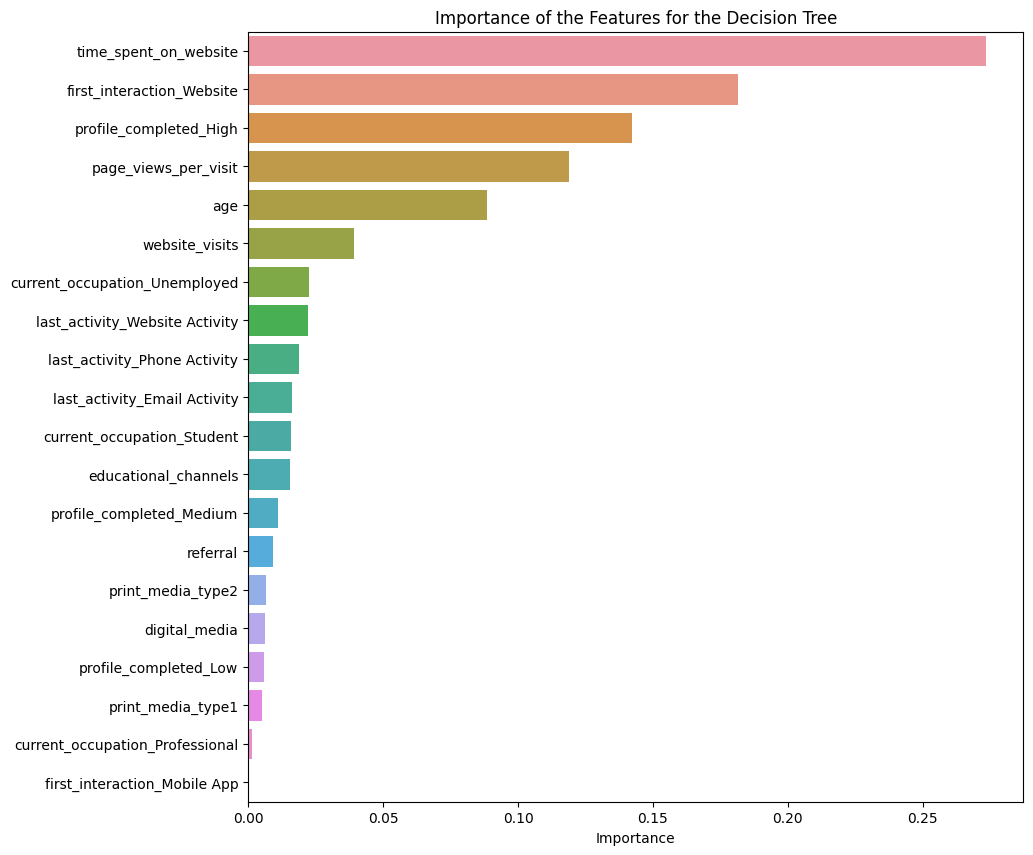

In [ ]:
# bar plot comparing the importance of each feature in the decision tree

importances = dtree.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 10))
sns.barplot(x = importance_df.Importance, y = importance_df.index).set(title="Importance of the Features for the Decision Tree")

The most important feature was time spent on the website. Other important features include whether the first interaction was on the website, whether a High amount of the profile was completed, the page views per visit, and age.

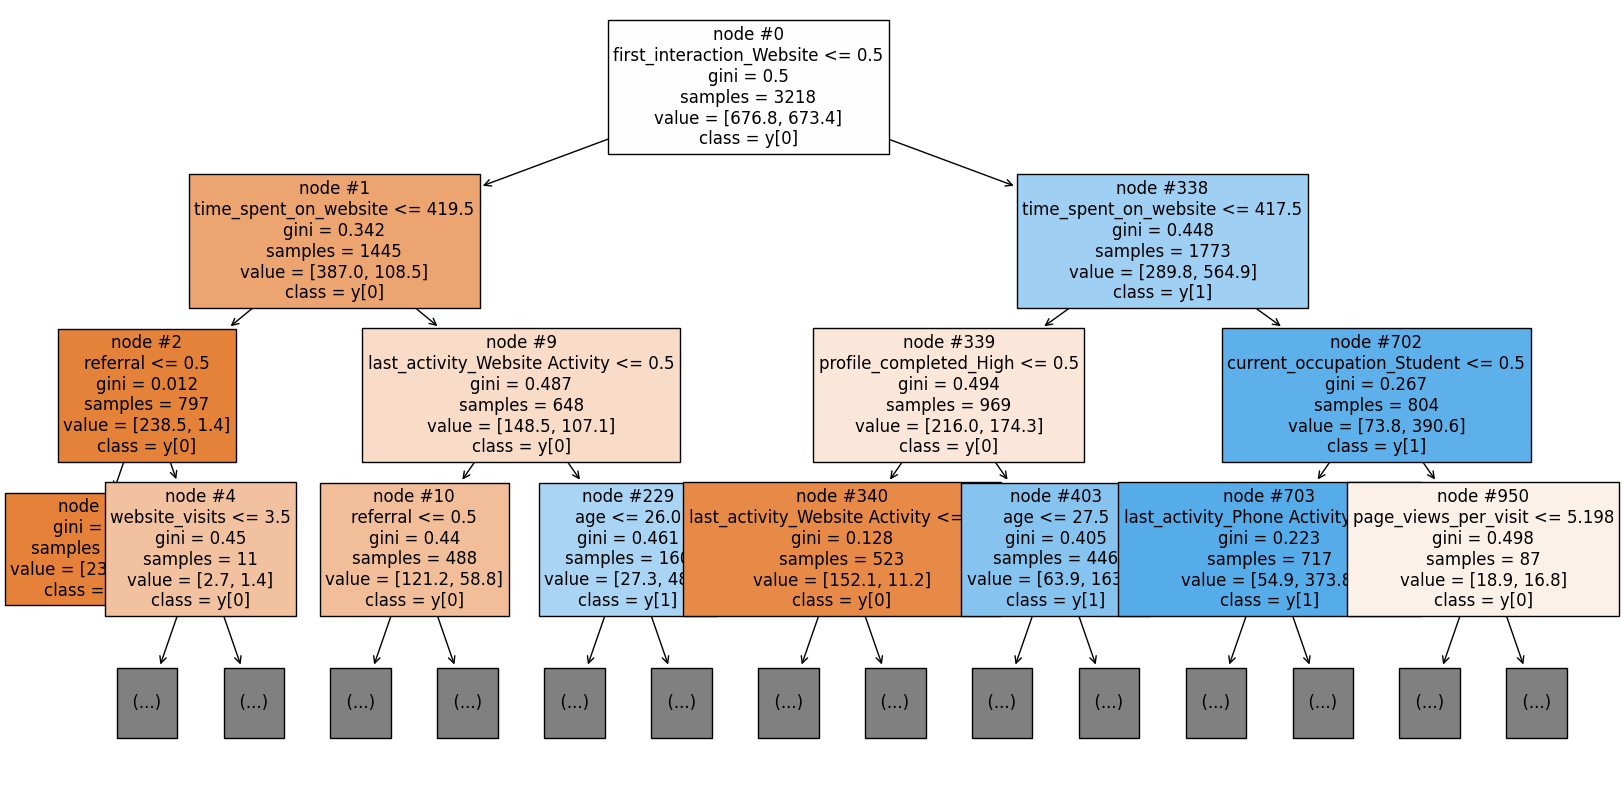

In [ ]:
# displaying the actual decision tree

features = list(X.columns)
plt.figure(figsize = (20, 10))
tree.plot_tree(dtree, max_depth = 3, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

The tree is first split by whether the first interaction was on the website or mobile app. If it was, the data is further split by time spent on the website, then by referral and whether their last activity was on the website or not. If the first interaction was not the website, the data is split by time spent on the website. It is then further split on whether lots of the profile was completed, and whether the lead was a student.

## Do we need to prune the tree?

In [ ]:
# building the decision tree model, but pruning it to only have 5 levels
dtree_pruned = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, max_depth = 5, random_state = 1)
dtree_pruned.fit(X_train, Y_train)
y_train_pred_dt_pruned = dtree_pruned.predict(X_train)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2256
           1       0.69      0.88      0.78       962

    accuracy                           0.85      3218
   macro avg       0.82      0.86      0.83      3218
weighted avg       0.87      0.85      0.85      3218



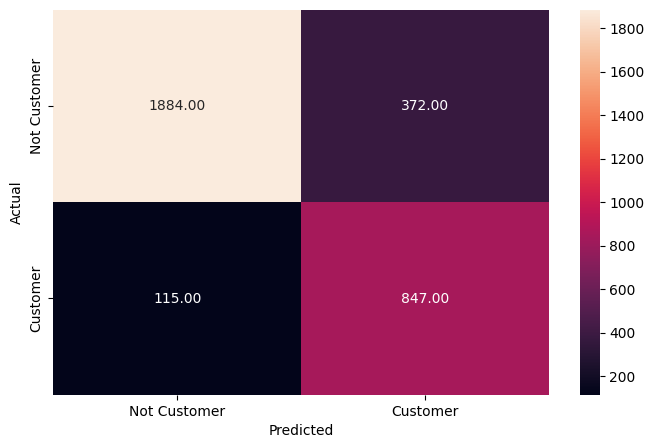

In [ ]:
# analyzing the performance of model on the training data
score(Y_train, y_train_pred_dt_pruned)

* The accuracy is not so good, 85% accurate
* The recall is 88%
* Does not seem to be overfitting the data

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       967
           1       0.68      0.88      0.77       413

    accuracy                           0.84      1380
   macro avg       0.81      0.85      0.82      1380
weighted avg       0.86      0.84      0.85      1380



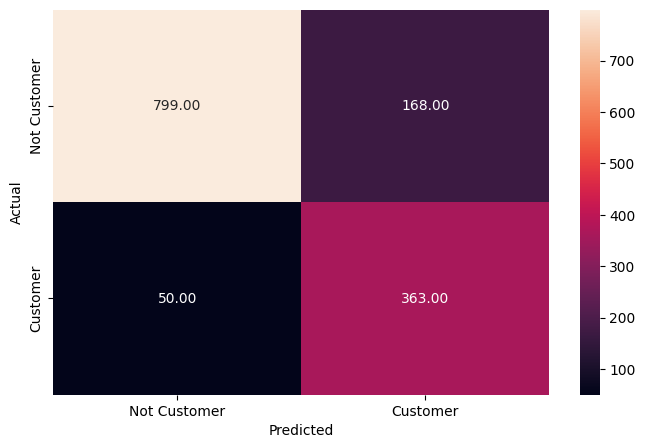

In [ ]:
# checking the performance on the test data
y_test_pred_dt_pruned = dtree_pruned.predict(X_test)

score(Y_test, y_test_pred_dt_pruned)

The model has similar results for the test data as it had for the training data.
The accuracy is 84% and recall is 88%.
Let's try a random forest to see if we can get a better model. Perhaps adjusting the depth of this decision tree could help for further investigation.

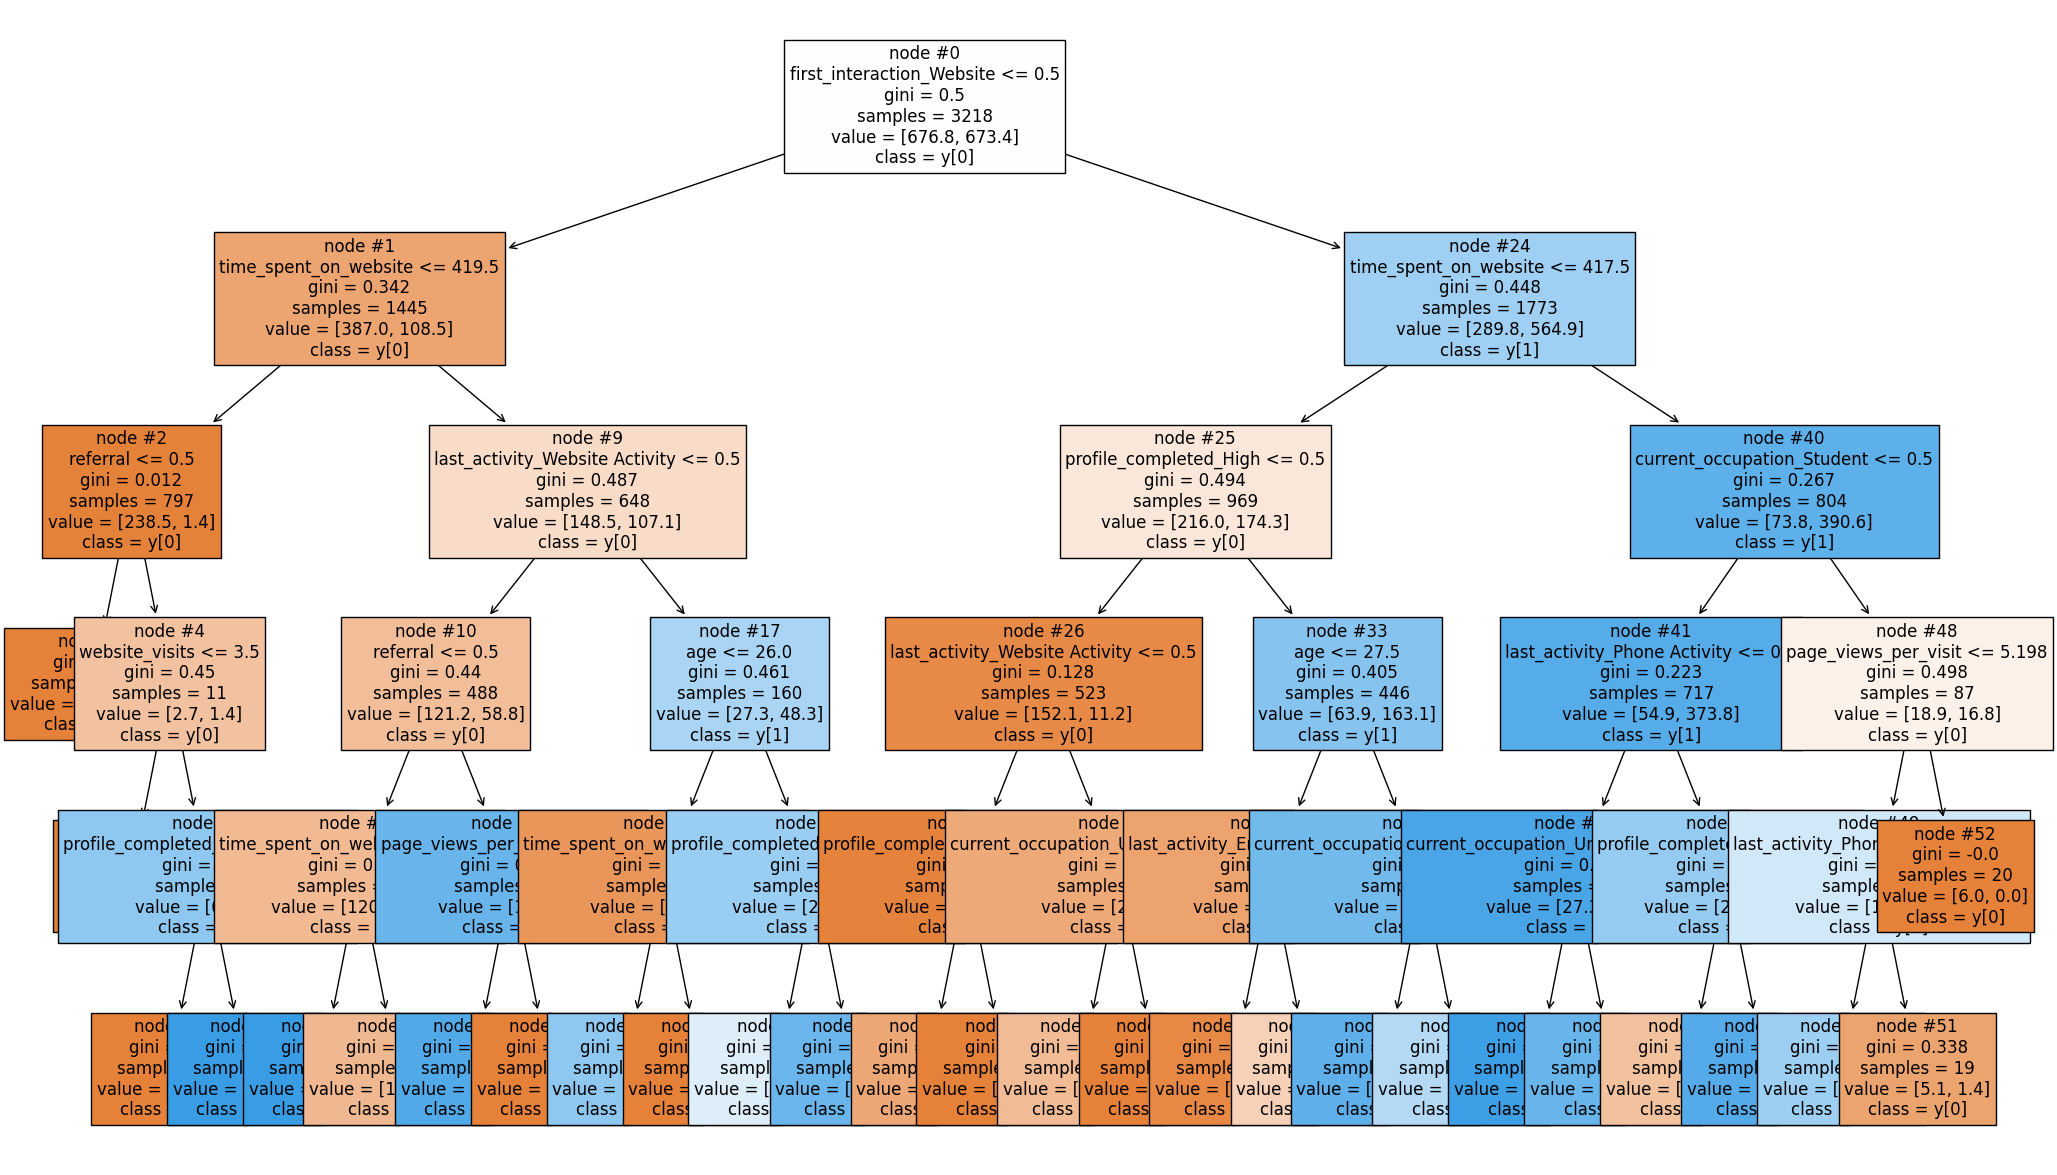

In [ ]:
# displaying the pruned decision tree

features = list(X.columns)
plt.figure(figsize = (25, 15))
tree.plot_tree(dtree_pruned, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

It is the same as the original decision tree for the first few levels. We have now pruned the tree to only have a depth of 5 levels.

## Building a Random Forest model

In [ ]:
# building a random forest model

random_forest_estimator = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# fitting the training data to the model
random_forest_estimator.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2256
           1       1.00      1.00      1.00       962

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



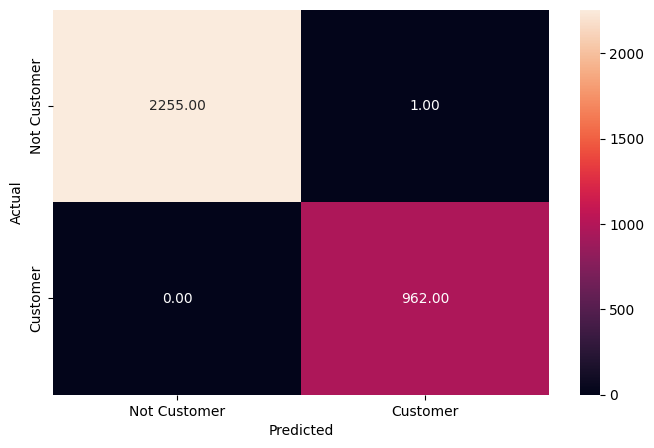

In [ ]:
# analyzing the prediction power of the random forest model for the training data

y_pred_train_random_forest = random_forest_estimator.predict(X_train)

score(Y_train, y_pred_train_random_forest)

The model is 100% accurate which means it is overfitting the data and won't be any good.

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       967
           1       0.77      0.70      0.74       413

    accuracy                           0.85      1380
   macro avg       0.83      0.81      0.82      1380
weighted avg       0.85      0.85      0.85      1380



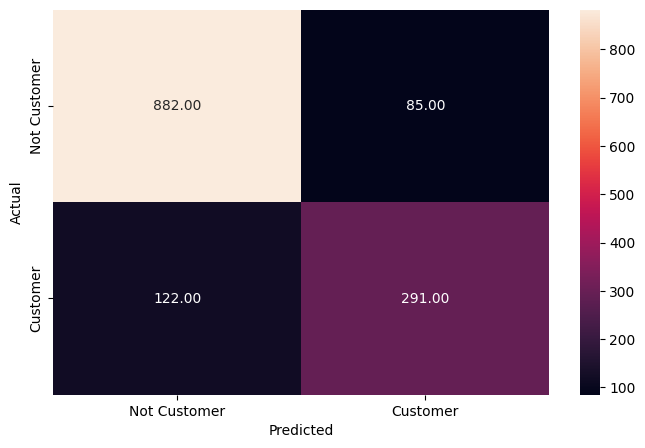

In [ ]:
# let's now test the model with the test data

y_pred_test_random_forest = random_forest_estimator.predict(X_test)

score(Y_test, y_pred_test_random_forest)

For the test data, the model was 85% accurate at prediction. However the recall is only 70%.

<Axes: xlabel='Importance'>

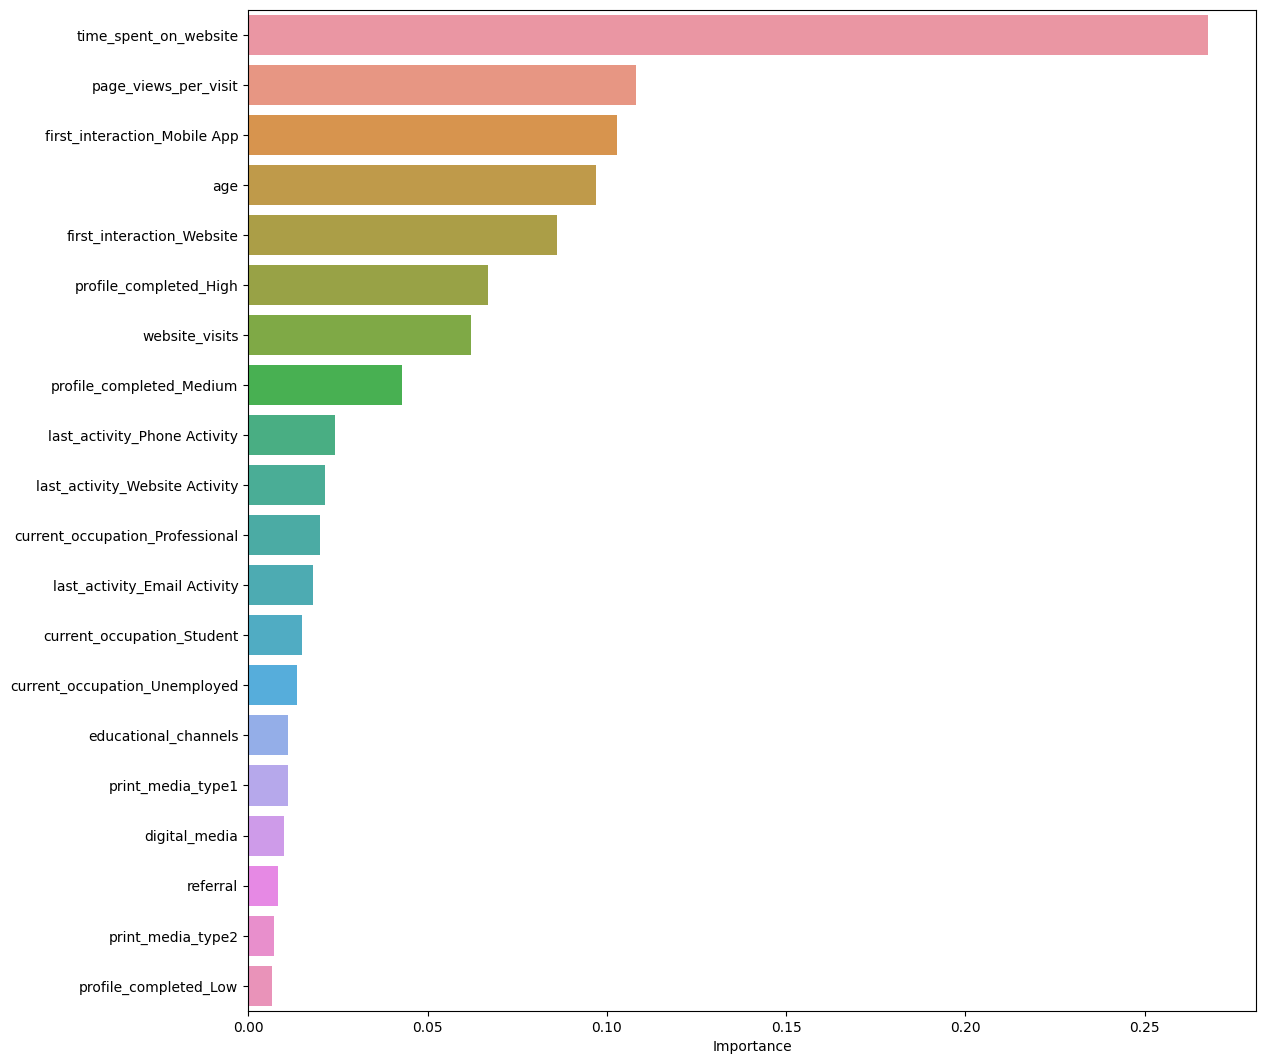

In [ ]:
# bar graph displaying the feature importance discovered while building the model (in order of importance)

importances = random_forest_estimator.feature_importances_
columns = X.columns
importance_df_rf = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x = importance_df_rf.Importance, y = importance_df_rf.index)

Time spent on the website was the most important feature utilized to build the random forest model. Other important features include page views per visit, whether or not the first interaction was on the mobile app, age, whether the first interaction was on the website, and whether or not a significant amount of the profile was completed.

## Do we need to prune the tree?

In [ ]:
# pruning the forest by giving computer choices to find optimal forest
forest_estimator_pruned = RandomForestClassifier(class_weight = {0: 0.3, 1: 0.7}, random_state = 1)

# options to choose from
options_random_forest = {
        "n_estimators": [50, 100],
        "min_samples_leaf": np.arange(1, 3, 1),
        "max_features": [0.7, 0.9, 'sqrt'],
}


# recall score for each different option combination
score2 = metrics.make_scorer(recall_score, pos_label = 1)

# run search
grid = GridSearchCV(forest_estimator_pruned, options_random_forest, scoring = score2, cv = 5)
grid = grid.fit(X_train, Y_train)

# the pruned model is now the best combo of options
forest_estimator_pruned = grid.best_estimator_

In [ ]:
# fitting the model to the training data
forest_estimator_pruned.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, min_samples_leaf=2,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      2256
           1       0.88      0.95      0.91       962

    accuracy                           0.94      3218
   macro avg       0.93      0.95      0.94      3218
weighted avg       0.95      0.94      0.95      3218



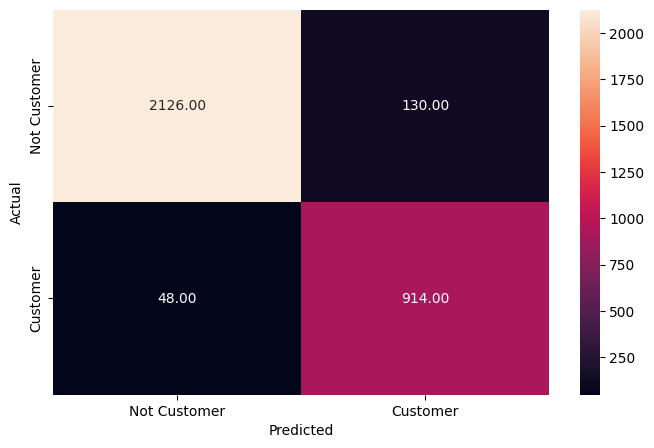

In [ ]:
# analyzing predicting power on the training data
y_pred_train_rf_tuned = forest_estimator_pruned.predict(X_train)

score(Y_train, y_pred_train_rf_tuned)

Best model so far. 94% accurate and 95% recall. Not overfitting.

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       967
           1       0.74      0.79      0.77       413

    accuracy                           0.86      1380
   macro avg       0.83      0.84      0.83      1380
weighted avg       0.86      0.86      0.86      1380



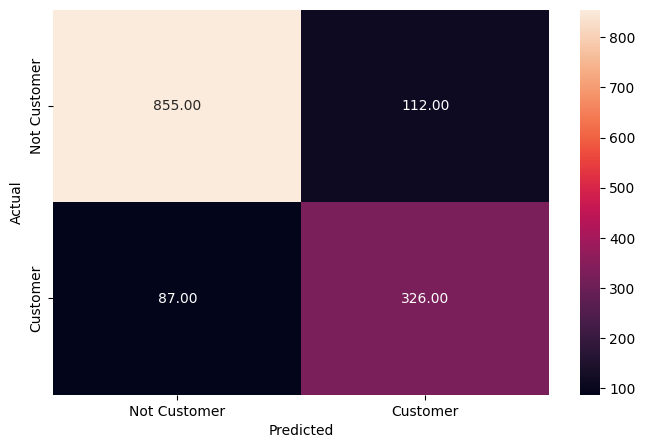

In [ ]:
# analyzing prediction power on the test data
y_pred_test_rf_pruned = forest_estimator_pruned.predict(X_test)

score(Y_test, y_pred_test_rf_pruned)

Pruning the model definitely improved the recall to 79% (previously 70%). The accuracy is 86%. The model is quite good but could still be improved.

<Axes: xlabel='Importance'>

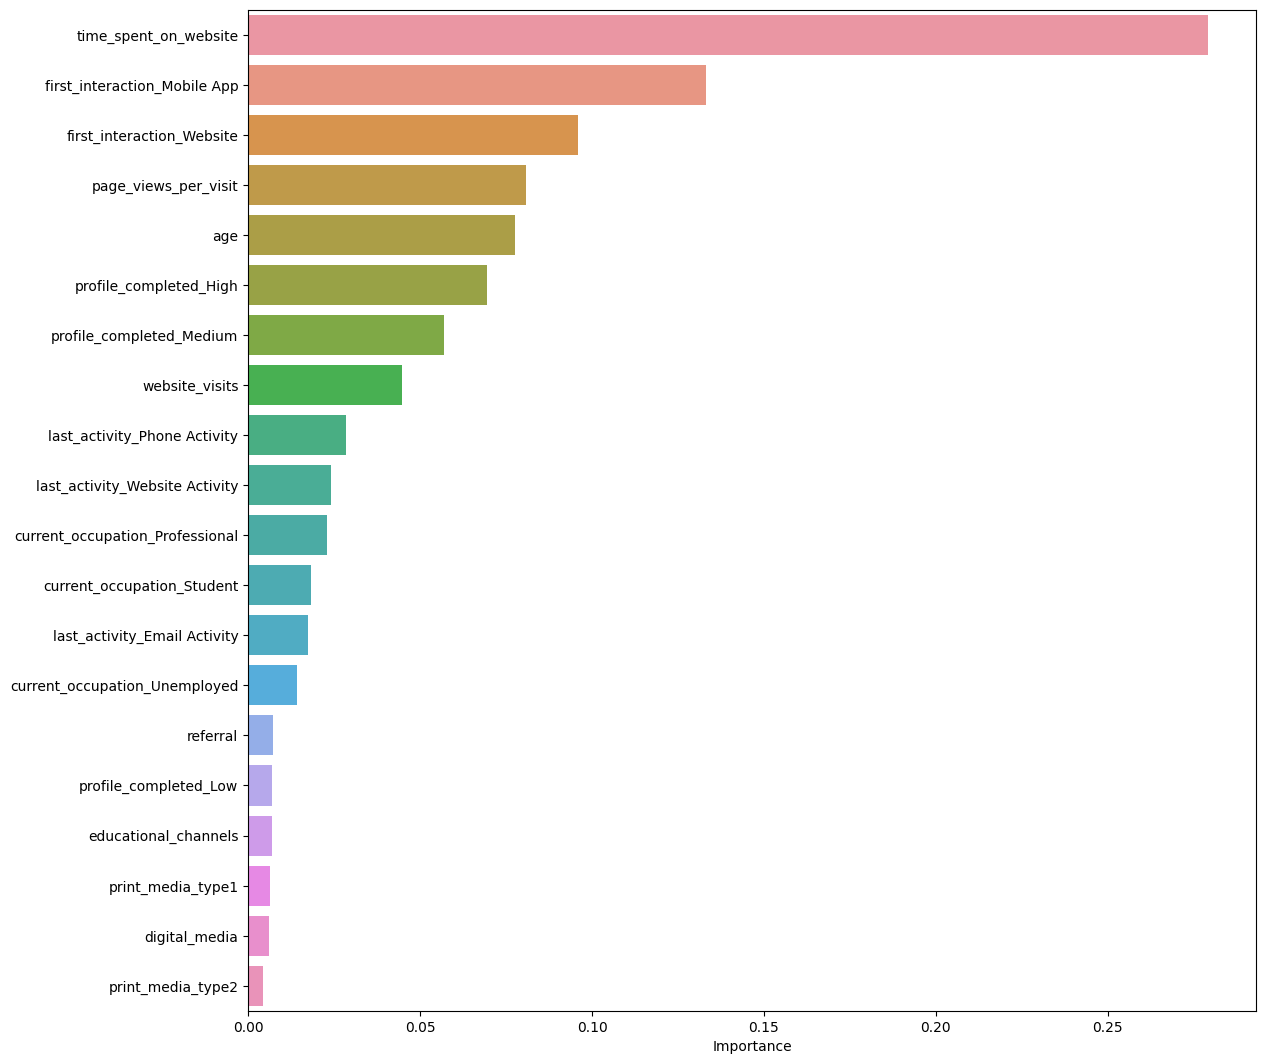

In [ ]:
# bar graph displaying feature importance for the pruned random forest

importances = forest_estimator_pruned.feature_importances_
columns = X.columns
importance_df_forest2 = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x = importance_df_forest2.Importance, y = importance_df_forest2.index)

The most important feature was the time spent on the website. Other important features were mobile app interaction and website interaction, page views per website visit, age, and profile completion.

## Actionable Insights and Recommendations

* The first interaction is very important in determining whether or not a lead becomes a paying customer. Leads who first interact on the website are far more likely to become a customer than a lead who first interacts on the mobile app. The mobile app gets a decent amount of users but fails to convert leads to customers. Perhaps the app needs updating and improving, but the website is good at turning leads into customers.
* The majority of customers are Professionals, followed by a small group of unemployed customers, and a very tiny group of student customers.
* 2/3rds of referrals turn into paying customers. We should encourage referrals in marketing strategies.
* Leads who spend a longer amount of time on the website tend to more often become paying customers compared to people who don't spend very long on the website. We should make the website as engaging and visually pleasing as possible.
* Leads who complete most of their profile are more likely to become a customer compared to leads who only fill out half or a small amount of their profile. We should make it as easy as possible to complete the profile.
* If a lead's last activity was a phone call, they most likely will not become a paying customer - maybe the phone customer service needs improvement. There is a greater chance of someone becoming a customer if their last activity is by email or on the website. We should always follow up with emails.
* On the whole, customers are a bit older than non-customers.
* About 50% of leads who see an advertisement in the media, in a newspaper, or in a magazine become customers. It would be smart to keep advertising using these avenues.


In conclusion, a lead profile that would likely become a paying customer is one who is a professional, has completed a great amount of their profile, was referred by someone, has spent lots of time on the website, and their first interaction was on the website (not on the mobile app).

In [ ]:
! pwd

/content


In [ ]:
%%shell
jupyter nbconvert --to html /////content/drive/MyDrive/GraceJeffery-Project2-MIT.ipynb

[NbConvertApp] Converting notebook /////content/drive/MyDrive/GraceJeffery-Project2-MIT.ipynb to html
[NbConvertApp] Writing 2513016 bytes to /content/drive/MyDrive/GraceJeffery-Project2-MIT.html
